## Overall Happiness Analysis

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [91]:
# Import Data
data_2015 = pd.read_csv('2015.csv', index_col = 'Country')
data_2016 = pd.read_csv('2016.csv', index_col = 'Country')
data_2017 = pd.read_csv('2017.csv', index_col = 'Country')
data_2018 = pd.read_csv('2018.csv', index_col = 'Country or region')
data_2019 = pd.read_csv('2019.csv', index_col = 'Country or region')

# Insert 'Year' Column
data_2019['Year']='2019'
data_2018['Year']='2018'
data_2017['Year']='2017'
data_2016['Year']='2016'
data_2015['Year']='2015'

data_2015.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Country,,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [92]:
# Change Column Names
data_2015.rename(columns = {'Happiness Rank': 'Rank', 'Happiness Score':'Score'}, inplace = True)
data_2016.rename(columns = {'Happiness Rank': 'Rank', 'Happiness Score':'Score'}, inplace = True)
data_2017.rename(columns = {'Happiness.Rank': 'Rank', 'Happiness.Score':'Score'}, inplace = True)
data_2018.index.name = 'Country'
data_2018.rename(columns = {'Overall rank': 'Rank'}, inplace = True)
data_2019.index.name = 'Country'
data_2019.rename(columns = {'Overall rank': 'Rank'}, inplace = True)

In [93]:
# Columns of Interest
df_2015 = data_2015[['Region', 'Rank', 'Score', 'Year']]
df_2016 = data_2016[['Region', 'Rank', 'Score', 'Year']] 
df_2017 = data_2017[['Rank', 'Score', 'Year']] 
df_2018 = data_2018[['Rank', 'Score', 'Year']] 
df_2019 = data_2019[['Rank', 'Score', 'Year']] 

In [94]:
#Data Profiling 

#check if null values exist in any dataset  - None exist 
df_2015[df_2015.isnull().any(axis =1) == True]
df_2016[df_2016.isnull().any(axis =1) == True]
df_2017[df_2017.isnull().any(axis =1) == True]
df_2018[df_2018.isnull().any(axis =1) == True]
df_2019[df_2019.isnull().any(axis =1) == True]


#check if list countries used for assessment is same over the years
print("Count of countries in list")
print("2015: ", df_2015.count()[0])
print("2016: ", df_2016.count()[0])
print("2017: ", df_2017.count()[0])
print("2018: ", df_2018.count()[0])

Count of countries in list
2015:  158
2016:  157
2017:  155
2018:  156


In [95]:
#Data Cleaning/Transformation 

#Create a country mapping table 
all_years = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis = 1, keys = [2015, 2016, 2017, 2018, 2019])
all_years[all_years.isnull().any(axis=1) == True]

#Update to currrent country name and region where needed 
all_countries = all_years
all_countries['new_name'] = all_countries.index
all_countries = all_countries['new_name']
all_countries = pd.concat([all_countries, df_2015['Region']], axis = 1)

all_countries.at['Taiwan Province of China', 'new_name'] = 'Taiwan'
all_countries.at['Taiwan Province of China', 'Region'] = 'Eastern Asia'

#China/Hong Kong reported separately - dont combine 
#all_countries.at['Hong Kong S.A.R., China', 'new_name'] = 'China'
all_countries.at['Hong Kong S.A.R., China', 'Region'] = 'Eastern Asia'

all_countries.at['North Macedonia', 'new_name'] = 'Macedonia'
all_countries.at['North Macedonia', 'Region'] = 'Central and Eastern Europe'

all_countries.at['Trinidad & Tobago', 'new_name'] = 'Trinidad and Tobago'
all_countries.at['Trinidad & Tobago', 'Region'] = 'Latin America and Caribbean'

all_countries.at['Northern Cyprus', 'new_name'] = 'North Cyprus'
all_countries.at['Northern Cyprus', 'Region'] = 'Western Europe'

all_countries.at['Somaliland region', 'new_name'] = 'Somaliland Region'
all_countries.at['Somaliland Region', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['Somalia', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['South Sudan', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['Gambia', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['Namibia', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['Belize', 'Region'] = 'Latin America and Caribbean'

all_countries.at['Puerto Rico', 'Region'] = 'Latin America and Caribbean'

all_countries[all_countries.isnull().any(axis =1) == True]

all_countries.rename(columns = {'Region': 'new_region'}, inplace = True)

all_countries

,new_name,new_region
Switzerland,Switzerland,Western Europe
Iceland,Iceland,Western Europe
Denmark,Denmark,Western Europe
Norway,Norway,Western Europe
Canada,Canada,North America
...,...,...
"Hong Kong S.A.R., China","Hong Kong S.A.R., China",Eastern Asia
Trinidad & Tobago,Trinidad and Tobago,Latin America and Caribbean
Northern Cyprus,North Cyprus,Western Europe
North Macedonia,Macedonia,Central and Eastern Europe


In [96]:
#update df with cleaned country name/region 
df_2015 = pd.concat([df_2015, all_countries], axis = 1).dropna()
df_2015 = df_2015.set_index('new_name')
df_2015 = df_2015[['Rank', 'Score', 'new_region']]
df_2015

df_2016 = pd.concat([df_2016, all_countries], axis = 1).dropna()
df_2016 = df_2016.set_index('new_name')
df_2016 = df_2016[['Rank', 'Score', 'new_region']]
df_2016


df_2017 = pd.concat([df_2017, all_countries], axis = 1).dropna()
df_2017 = df_2017.set_index('new_name')
df_2017 = df_2017[['Rank', 'Score', 'new_region']]
df_2017

df_2018 = pd.concat([df_2018, all_countries], axis = 1).dropna()
df_2018 = df_2018.set_index('new_name')
df_2018 = df_2018[['Rank', 'Score', 'new_region']]
df_2018

df_2019 = pd.concat([df_2019, all_countries], axis = 1).dropna()
df_2019 = df_2019.set_index('new_name')
df_2019 = df_2019[['Rank', 'Score', 'new_region']]
df_2019

,Rank,Score,new_region
new_name,,,
Finland,1.0,7.769,Western Europe
Denmark,2.0,7.600,Western Europe
Norway,3.0,7.554,Western Europe
Iceland,4.0,7.494,Western Europe
Netherlands,5.0,7.488,Western Europe
...,...,...,...
Rwanda,152.0,3.334,Sub-Saharan Africa
Tanzania,153.0,3.231,Sub-Saharan Africa
Afghanistan,154.0,3.203,Southern Asia


In [97]:
#Combine all years 
all_countries = all_countries.set_index('new_name')
all_countries.rename(columns = {'new_region': 'Region'}, inplace = True)
all_countries = all_countries[~all_countries.index.duplicated(keep='last')]
all_countries

all_years = pd.concat( [all_countries, df_2015.loc[:, :'Score'], df_2016.loc[:, :'Score'], df_2017.loc[:, :'Score'], df_2018.loc[:, :'Score'], df_2019.loc[:, :'Score']], axis = 1, keys = ['Region', 2015, 2016, 2017, 2018, 2019])


df_2015['Year'] = '2015'
df_2016['Year'] = '2016'
df_2017['Year'] = '2017'
df_2018['Year'] = '2018'
df_2019['Year'] = '2019'

all_years

Region  2015         2016  \
                                              Region  Rank  Score  Rank   
Switzerland                           Western Europe   1.0  7.587   2.0   
Iceland                               Western Europe   2.0  7.561   3.0   
Denmark                               Western Europe   3.0  7.527   1.0   
Norway                                Western Europe   4.0  7.522   4.0   
Canada                                 North America   5.0  7.427   6.0   
...                                              ...   ...    ...   ...   
Hong Kong S.A.R., China                 Eastern Asia   NaN    NaN   NaN   
Trinidad and Tobago      Latin America and Caribbean  41.0  6.168  43.0   
North Cyprus                          Western Europe  66.0  5.695  62.0   
Macedonia                 Central and Eastern Europe  93.0  5.007  95.0   
Gambia                            Sub-Saharan Africa   NaN    NaN   NaN   

                                2017         2018          2019         
                         Score  Rank  Score  Rank  Score   Rank  Score  
Switzerland              7.509   4.0  7.494   5.0  7.487    6.0  7.480  
Iceland                  7.501   3.0  7.504   4.0  7.495    4.0  7.494  
Denmark                  7.526   2.0  7.522   3.0  7.555    2.0  7.600  
Norway                   7.498   1.0  7.537   2.0  7.594    3.0  7.554  
Canada                   7.404   7.0  7.316   7.0  7.328    9.0  7.278  
...                        ...   ...    ...   ...    ...    ...    ...  
Hong Kong S.A.R., China    NaN  71.0  5.472   NaN    NaN    NaN    NaN  
Trinidad and Tobago      6.168  38.0  6.168  38.0  6.192   39.0  6.192  
North Cyprus             5.771  61.0  5.810  58.0  5.835   64.0  5.718  
Macedonia                5.121  92.0  5.175  89.0  5.185   84.0  5.274  
Gambia                     NaN   NaN    NaN   NaN    NaN  120.0  4.516  

[165 rows x 11 columns]

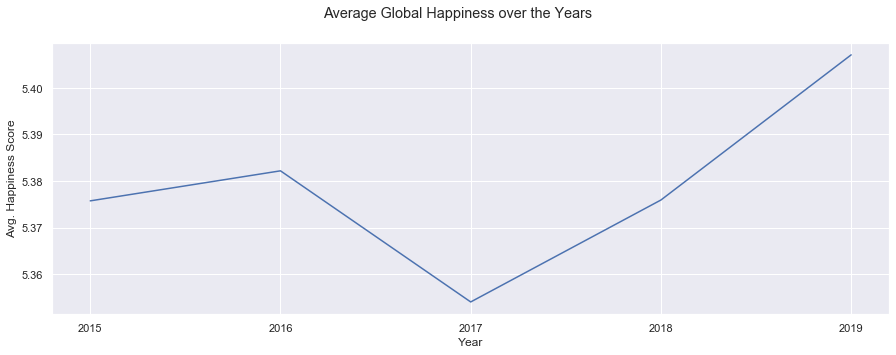

In [98]:
#Analysis over all years 
#Overall Happiness Score over years 
sns.set() 

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Average Global Happiness over the Years')
all_byyear = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0).groupby('Year').mean()

fig = sns.lineplot(data = all_byyear, x= all_byyear.index.values ,y='Score')
fig.set(xlabel='Year', ylabel='Avg. Happiness Score')

None

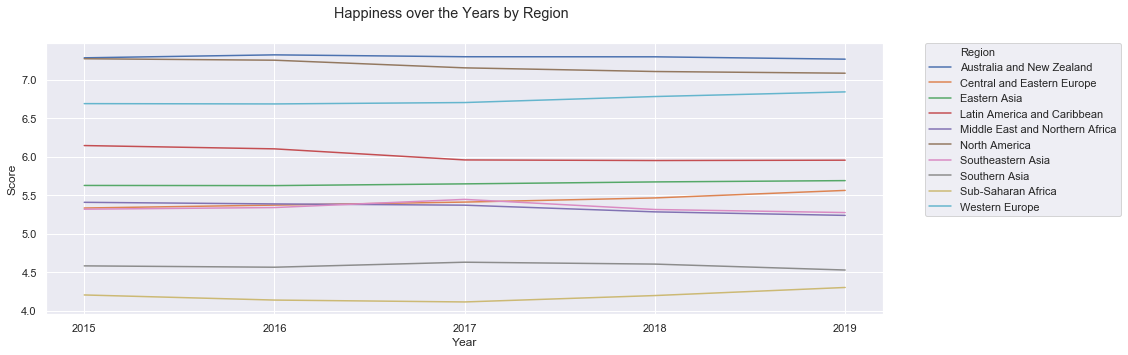

In [99]:
#Generosity by region by year 
fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Happiness over the Years by Region')
all_byyrreg = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0).groupby(['Year', 'new_region']).mean()
all_byyrreg=all_byyrreg.reset_index()
all_byyrreg.rename(columns = {'new_region':'Region'}, inplace = True )
all_byyrreg

fig = sns.lineplot(data = all_byyrreg, x= 'Year' ,y='Score', hue = 'Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None

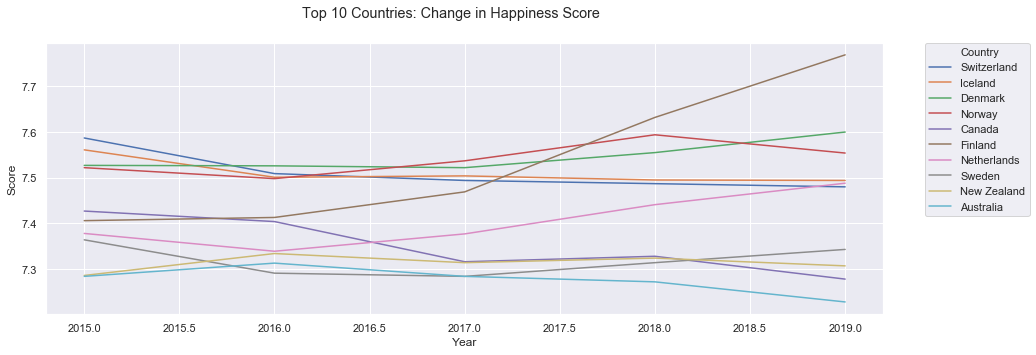

In [100]:
#top 10 countries in 2015 by Happiness Score  
top10countries = df_2015.sort_values(by = ['Rank']).head(10).index.values

top10 = all_years[[(2015, 'Score'), (2016, 'Score'), (2017, 'Score'), (2018, 'Score'), (2019, 'Score')]]
#top10 = top10.loc[top10countries, :]
#top10 = top10.xs('Rank', axis=1, level = 1, drop_level=True).stack()
#top10.reset_index()
#reset_index
top10 = top10.loc[top10countries, :].xs('Score', axis=1, level = 1, drop_level=True).stack().reset_index()
top10.rename(columns = {'level_0':'Country', 'level_1':'Year', 0:'Score'}, inplace = True )
top10

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Top 10 Countries: Change in Happiness Score')
fig = sns.lineplot(data = top10, x= 'Year' ,y='Score', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None
#fig.set(xlabel='Year', ylabel='Average Happiness Score')

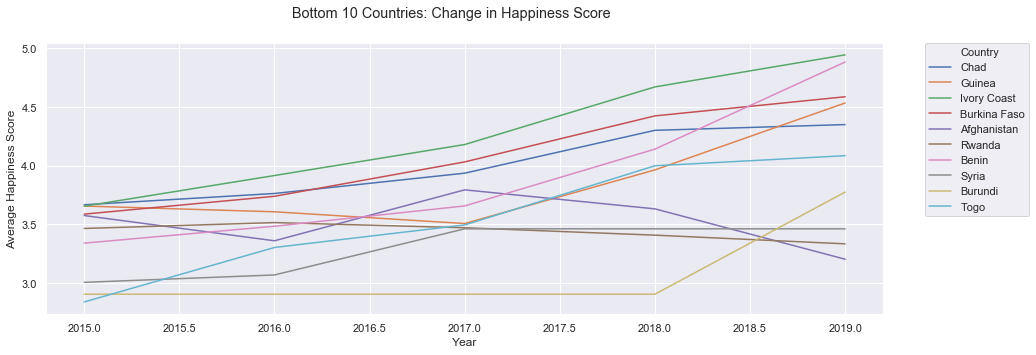

In [101]:
#bottom 10 countries in 2015 by Happiness Score  
bottom10countries = df_2015.sort_values(by = ['Rank']).tail(10).index.values

bottom10 = all_years[[(2015, 'Score'), (2016, 'Score'), (2017, 'Score'), (2018, 'Score'), (2019, 'Score')]]
#top10 = top10.loc[top10countries, :]
#top10 = top10.xs('Rank', axis=1, level = 1, drop_level=True).stack()
#top10.reset_index()
#reset_index
bottom10 = bottom10.loc[bottom10countries, :].xs('Score', axis=1, level = 1, drop_level=True).stack().reset_index()
bottom10.rename(columns = {'level_0':'Country', 'level_1':'Year', 0:'Score'}, inplace = True )
bottom10

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Bottom 10 Countries: Change in Happiness Score')
fig = sns.lineplot(data = bottom10, x= 'Year' ,y='Score', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.set(xlabel='Year', ylabel='Average Happiness Score')
None